## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.53521209,  0.04363946],
       [-0.00299025, -0.55173741],
       [ 0.61126756,  1.17353334],
       ...,
       [ 0.70268539, -0.2878348 ],
       [-0.56426782,  0.638483  ],
       [ 0.94046014, -0.12559658]])

In [5]:
y

array([ 8.04336763e-01, -1.05220935e+01,  3.70244010e+01, -2.98701324e+01,
        3.97287238e+00,  2.43130785e+01, -1.56707271e+01,  1.12511878e+01,
        1.18364495e+01,  1.28298887e+01,  6.64236436e+01,  2.25211098e+01,
        1.43915622e+01, -8.92882559e+00, -1.51999533e+01,  2.10224845e-01,
        4.18021579e+00, -2.38681301e+01, -4.79116723e+00, -1.84741024e+01,
        1.64925005e-01,  3.87531585e+01, -1.14522052e+00, -6.09864460e+00,
       -1.12398424e+01, -6.71162401e+01,  2.41925809e+01, -2.18763778e+01,
       -1.87092899e+01, -1.57769123e+00,  2.22064033e+01, -3.94084099e+01,
        6.89276242e+01, -1.10167709e+01, -1.71793914e+01, -3.25519093e+01,
       -3.10945998e+01, -1.04163052e+01, -4.41801999e+00, -3.01449654e+00,
       -5.88232224e+00, -2.78780549e+01, -9.75158059e+00, -3.57779350e+01,
        1.90344748e+00,  1.38000422e+01, -3.88221269e+01, -3.05422841e+01,
       -4.55226985e+01, -2.62414233e+01, -3.79399464e+01,  2.18817000e+01,
        9.81888576e+00,  

In [6]:
pd.DataFrame(X)[0]

0     -0.535212
1     -0.002990
2      0.611268
3     -0.377981
4      2.626778
         ...   
995    1.035833
996   -0.554008
997    0.702685
998   -0.564268
999    0.940460
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

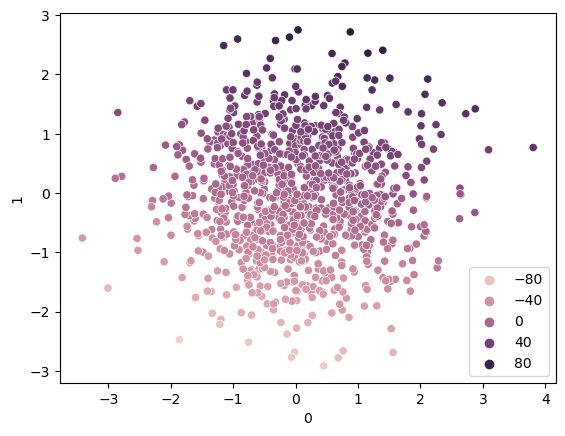

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[ 6.96285858, 30.2185929 ]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([-1.64876812e+01, -4.07489892e+01,  2.22560692e+01, -1.92025394e+00,
        4.63752304e+01,  4.55930746e+01,  2.93065808e+01,  3.41483631e+01,
        2.47913081e+01, -4.19667770e+00, -3.04865883e+01, -2.07905946e+01,
       -2.48807744e+01,  7.25292848e+00,  3.43752536e+01,  1.05102681e+01,
        6.35043432e+01,  2.64141723e+01, -3.90455252e-01,  1.47033319e+01,
       -2.00123561e+01,  2.06799639e+01,  1.42961811e+01,  3.44940682e+01,
        4.19720911e+01,  7.33042087e-01, -2.06639681e+01,  5.21373051e+01,
       -3.36311439e+01, -3.03407191e+01, -2.32975892e+01,  1.43972843e+00,
       -1.66786691e+01,  3.59748797e+01,  2.34921121e+01,  3.17118450e+00,
       -4.02484344e+01, -3.63678177e+01, -3.59294575e+00, -2.12830532e+01,
        1.88208359e+00, -7.30653377e+00, -8.88504572e+00, -2.32167327e+01,
        1.63276036e+01, -2.31440320e+01, -7.76656230e+00,  1.39424417e+01,
       -5.77962476e+01,  3.43127321e+01, -2.17927671e+01,  2.87438966e+01,
       -5.84268465e+01,  

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9876399278160813


## Hyperparametere Tuning With SVR

In [18]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [19]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.981 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.981 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [22]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9876326035425979
